In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
path = 'C:\\Users\\xMich\\OneDrive\\Pulpit\\Paidwork\\Train'

In [3]:
def load_and_preprocess_data(path):
    X = []
    y = []
    for class_number in range(len(os.listdir(path))):
        for image in os.listdir(f'{path}\\{class_number}'):
            image = cv2.imread(f'{path}\\{class_number}\\{image}', cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (30, 30))
            image = image / 255
            X.append(image)
            y.append(class_number)
    X = np.expand_dims(X, axis = -1)
    y = np.expand_dims(y, axis = -1)
    return np.array(X), np.array(y)

In [4]:
X, y = load_and_preprocess_data(path)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = (30, 30, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [8]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
981/981 [==============================] - 41s 40ms/step - loss: 1.2752 - accuracy: 0.6485
Epoch 2/10
981/981 [==============================] - 44s 45ms/step - loss: 0.2826 - accuracy: 0.9174
Epoch 3/10
981/981 [==============================] - 50s 51ms/step - loss: 0.1785 - accuracy: 0.9490
Epoch 4/10
981/981 [==============================] - 50s 51ms/step - loss: 0.1393 - accuracy: 0.9573
Epoch 5/10
981/981 [==============================] - 50s 51ms/step - loss: 0.1104 - accuracy: 0.9675
Epoch 6/10
981/981 [==============================] - 52s 53ms/step - loss: 0.0981 - accuracy: 0.9710
Epoch 7/10
981/981 [==============================] - 52s 53ms/step - loss: 0.0859 - accuracy: 0.9738
Epoch 8/10
981/981 [==============================] - 52s 53ms/step - loss: 0.0777 - accuracy: 0.9767
Epoch 9/10
981/981 [==============================] - 52s 53ms/step - loss: 0.0712 - accuracy: 0.9778
Epoch 10/10
981/981 [==============================] - 52s 53ms/step - loss: 0.070

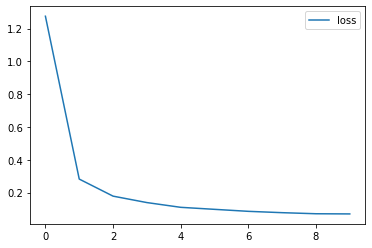

In [9]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'])
plt.legend(['loss'])
plt.show()

In [10]:
accuracy = accuracy_score(np.argmax(y_train, axis = -1), np.argmax(model.predict(X_train), axis = -1))
print(f'Train accuracy: {round(accuracy * 100, 2)}%')

981/981 [==============================] - 11s 11ms/step
Train accuracy: 99.7%


In [11]:
accuracy = accuracy_score(np.argmax(y_test, axis = -1), np.argmax(model.predict(X_test), axis = -1))
print(f'Test accuracy: {round(accuracy * 100, 2)}%')

246/246 [==============================] - 3s 11ms/step
Test accuracy: 99.38%
